<a href="https://colab.research.google.com/github/Danddt/Russian_Opinion_Polls/blob/main/globe_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np

## Societal and Culture Data

Exploring the distatance between the cultural and societal values and to what degree these values are actually realised in society. 
The spread between Values and Practice. From the study I am selecting the country cluster, as identified in the study, that includes Russia, the Eastern European Cluster and the individual countries that share a geographical border with Russia. 

In [ ]:
society = pd.read_csv('/content/drive/MyDrive/Globe_Project/GLOBE-Phase-2-Aggregated-Societal-Culture-Data.csv')

In [ ]:
#Clean up column names 
society.columns = society.columns.str.strip()
society.columns =society.columns.str.replace('Humane', 'Human')

In [ ]:
result = '\n'.join(society.columns[2:-1].to_list() )
print('The study includes the following parameters:\n',result)

The study includes the following parameters:
 Uncertainty Avoidance Societal Practices
Future Orientation Societal Practices
Power Distance Societal Practices
Collectivism I Societal Practices (Institutional Collectivism)
Human Orientation Societal Practices
Performance Orientation Societal Practices
Collectivism II Societal Practices (In-group Collectivism)
Gender Egalitarianism Societal Practices
Assertiveness Societal Practices
Uncertainty Avoidance Societal Values
Future Orientation Societal Values
Power Distance Societal Values
Collectivism I Societal Values (Institutional Collectivism)
Human Orientation Societal Values
Performance Orientation Societal Values
Collectivism II Societal Values (In-group Collectivism)
Gender Egalitarianism Societal Values
Assertiveness Societal Values


In [ ]:
east_europe = society[society['Country Cluster']=='Eastern Europe']['Country Name'].to_list()

In [ ]:
clusters_vid = (society.groupby('Country Cluster')['Country Name'].agg(' ,'.join))
clusters_vid.to_csv('/content/drive/MyDrive/Globe_Project/clusters_vid.csv')

In [ ]:
neigh = ['Finland', 'China', 'USA', 'Japan','England', 'Germany' ]

In [ ]:
# Russia geographical Neighbours plus countries in cluster
# Russian Neighbours

# And I'll add into the mix GermanY (close trading relations, but I'll skip Italy) and the UK as education site of choice for wealthy Russians (arbitrary, I know)

print('The countries in the Estern European Cluster are:',east_europe )
print('Geographical neighbours, and or trading/educational partners, present in the study:', neigh)

The countries in the Estern European Cluster are: ['Hungary', 'Russia', 'Kazakhstan', 'Albania', 'Poland', 'Greece', 'Slovenia', 'Georgia']
Geographical neighbours, and or trading/educational partners, present in the study: ['Finland', 'China', 'USA', 'Japan', 'England', 'Germany']


In [ ]:
selected_countries = east_europe + neigh

In [ ]:
pattern = '|'.join(selected_countries)

considered=society[society['Country Name'].str.contains(pattern)]

In [ ]:
considered=society[society['Country Name'].str.contains(pattern)]

In [ ]:
# Reorder columns to make it easier to compare diff between Value and Practice
param_list =considered.columns[2:-1].to_list()

value_list =[]
practice_list = []

for item in param_list:
  if 'Values' in item:
    value_list.append(item)
  else:
    practice_list.append(item)

colum_reorder= []

for item in range (9):
  colum_reorder.append(value_list[item])
  colum_reorder.append(practice_list[item])

reordered = considered.iloc[:, 2:-1]
reordered =reordered[colum_reorder]


In [ ]:
society_reordered = society[['Country Name', 'Country Cluster']].join(society[colum_reorder])
society_reordered.head()

,Country Name,Country Cluster,Uncertainty Avoidance Societal Values,Uncertainty Avoidance Societal Practices,Future Orientation Societal Values,Future Orientation Societal Practices,Power Distance Societal Values,Power Distance Societal Practices,Collectivism I Societal Values (Institutional Collectivism),Collectivism I Societal Practices (Institutional Collectivism),Human Orientation Societal Values,Human Orientation Societal Practices,Performance Orientation Societal Values,Performance Orientation Societal Practices,Collectivism II Societal Values (In-group Collectivism),Collectivism II Societal Practices (In-group Collectivism),Gender Egalitarianism Societal Values,Gender Egalitarianism Societal Practices,Assertiveness Societal Values,Assertiveness Societal Practices
0,England,Anglo,4.11,4.65,5.06,4.28,2.80,5.15,4.31,4.27,5.43,3.72,5.90,4.08,5.55,4.08,5.17,3.67,3.70,4.15
1,Costa Rica,Latin America,4.58,3.82,5.20,3.60,2.58,4.74,5.18,3.93,4.99,4.39,5.90,4.12,6.08,5.32,4.64,3.56,4.05,3.75
2,Italy,Latin Europe,4.47,3.79,5.91,3.25,2.47,5.43,5.13,3.68,5.58,3.63,6.07,3.58,5.72,4.94,4.88,3.24,3.82,4.07
3,India,Southern Asia,4.73,4.15,5.60,4.19,2.64,5.47,4.71,4.38,5.28,4.57,6.05,4.25,5.32,5.92,4.51,2.90,4.76,3.73
4,Namibia,Sub-Sahara Africa,5.13,4.20,6.12,3.49,2.86,5.29,4.38,4.13,5.40,3.96,6.40,3.67,6.07,4.52,4.25,3.88,3.91,3.91


In [ ]:
# Sorry Check Republic but you cannot have your own cluster, so you are going with Germanic Europe
society_reordered['Country Cluster'] =society_reordered['Country Cluster'].str.strip().fillna('Germanic Europe')


In [ ]:
# split up data on regex

def split_parameter (data):
  splito = []
  country_society = data[['Country Name', 'Country Cluster']]
  society_values = country_society.join(data.filter(regex='Values')).set_index('Country Name')
  splito.append(society_values)

  society_practice = country_society.join(data.filter(regex='Practices')).set_index('Country Name')
  splito.append(society_practice)

  return splito


In [ ]:
display(split_parameter (society_reordered)[0].groupby('Country Cluster').mean().T)

Country Cluster,Anglo,Confucian Asia,Eastern Europe,Germanic Europe,Latin America,Latin Europe,Middle East,Nordic Europe,Southern Asia,Sub-Sahara Africa
Uncertainty Avoidance Societal Values,4.17750,4.740000,4.94375,3.493333,4.979,4.355000,5.050000,3.756667,5.118,5.0325
Future Orientation Societal Values,5.31125,5.313333,5.37625,4.666667,5.746,5.330000,5.830000,4.763333,5.864,6.0325
Power Distance Societal Values,2.95750,2.980000,2.83750,2.818333,2.518,2.565000,2.993333,2.550000,2.776,2.6625
Collectivism I Societal Values (Institutional Collectivism),4.31500,4.430000,4.33750,4.553333,5.320,4.845000,5.155000,4.080000,4.928,4.7550
Human Orientation Societal Values,5.35750,5.450000,5.42625,5.131667,5.332,5.581667,5.361667,5.636667,5.264,5.5525
Performance Orientation Societal Values,5.88875,5.531667,5.82125,5.310000,6.240,5.941667,5.853333,5.840000,5.974,6.3400
Collectivism II Societal Values (In-group Collectivism),5.73625,5.303333,5.57000,4.973333,6.058,5.661667,5.650000,5.653333,5.756,5.7925
Gender Egalitarianism Societal Values,4.82375,4.191667,4.46500,4.718333,4.769,4.771667,3.666667,4.823333,4.184,4.3150
Assertiveness Societal Values,3.87750,4.541667,3.77875,3.250000,3.540,3.720000,3.655000,3.560000,4.582,4.0300


In [ ]:
display(split_parameter (society_reordered)[1].groupby('Country Cluster').mean().T)

Country Cluster,Anglo,Confucian Asia,Eastern Europe,Germanic Europe,Latin America,Latin Europe,Middle East,Nordic Europe,Southern Asia,Sub-Sahara Africa
Uncertainty Avoidance Societal Practices,4.43750,4.421667,3.56500,5.008333,3.621,4.181667,3.868333,5.186667,4.184,4.1850
Future Orientation Societal Practices,4.14750,4.178333,3.37875,4.275000,3.537,3.678333,3.600000,4.356667,4.042,3.7425
Power Distance Societal Practices,4.86250,5.148333,5.25750,4.723333,5.328,5.210000,5.261667,4.543333,5.378,5.5175
Collectivism I Societal Practices (Institutional Collectivism),4.44875,4.796667,4.10000,3.961667,3.860,4.010000,4.211667,4.883333,4.442,4.2500
Human Orientation Societal Practices,4.22125,3.995000,3.85500,3.655000,4.029,3.715000,4.338333,4.166667,4.812,4.4350
Performance Orientation Societal Practices,4.40875,4.580000,3.72875,4.358333,3.851,3.938333,4.011667,3.916667,4.280,3.9975
Collectivism II Societal Practices (In-group Collectivism),4.39500,5.420000,5.53625,4.040000,5.524,4.803333,5.655000,3.753333,5.834,5.3700
Gender Egalitarianism Societal Practices,3.43375,3.181667,3.83875,3.251667,3.409,3.360000,2.956667,3.706667,3.332,3.1975
Assertiveness Societal Practices,4.16625,4.085000,4.33000,4.403333,4.154,3.995000,4.123333,3.663333,3.822,4.2075


In [ ]:
society_vid = society_reordered.sort_values(by='Country Cluster')
society_vid.to_csv('/content/drive/MyDrive/Globe_Project/soceity_reordered_vid.csv')

In [ ]:
# Looking at how paramater values spread across the considered countries
cons_values = split_parameter (considered)[0]
cons_practice = split_parameter (considered)[1]

A visual inspection (eyeballing the graph) shows that overall Values scores are higher than Practices. Calculating the difference between Values parameter and Practices parmaters is a simple way to see how far apart they are (the spread between the two).  

In [ ]:
param_list = reordered.columns.to_list()

def diff_val_prac(data):
  diff_selec = data[['Country Name', 'Country Cluster']]
  data = data.iloc[:, 2:]
  for cols in range(0, (len(param_list)),2):
    diff_selec[f'diff:{param_list[cols]}'] = abs(data.iloc[:, cols] - data.iloc[:, (cols+1)])
  diff_selec.columns = diff_selec.columns.str.replace(r" Values", "").str.strip()
  return diff_selec


In [ ]:
diffo = diff_val_prac(society_reordered).groupby('Country Cluster').mean()

<ipython-input-21-ef2773a2bf81>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diff_selec[f'diff:{param_list[cols]}'] = abs(data.iloc[:, cols] - data.iloc[:, (cols+1)])


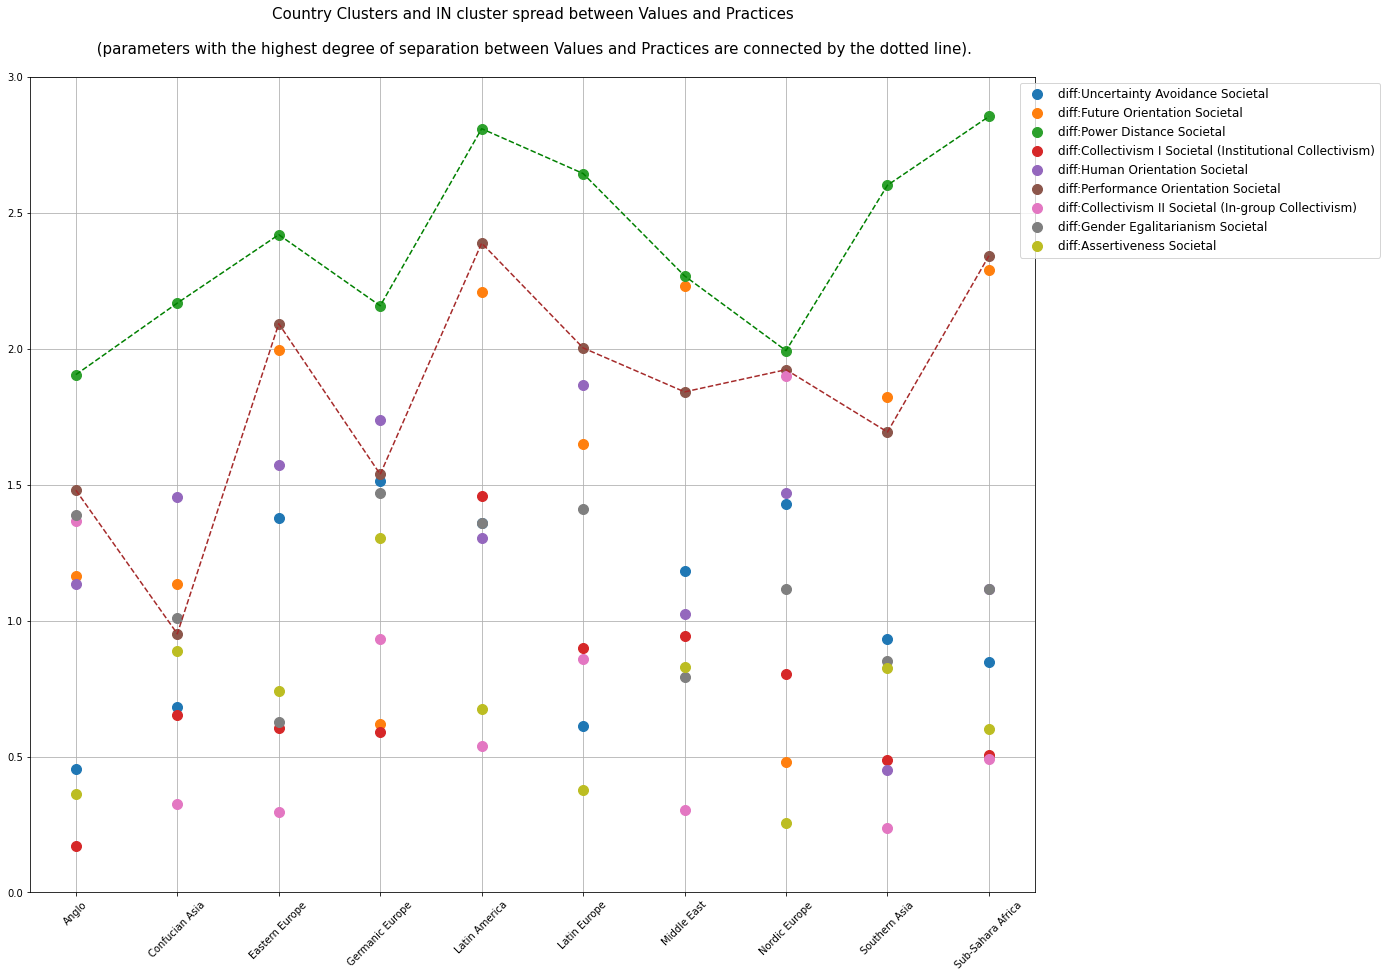

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18, 15))

plt.ylim(0,3)

plt.plot(diffo,marker ='o', markersize =10,linewidth = 0, )
plt.plot(diffo.index , diffo['diff:Power Distance Societal'],  linestyle='dashed', color='green')
plt.plot(diffo.index , diffo['diff:Performance Orientation Societal'],  linestyle='dashed', color='brown')

plt.grid()
plt.legend(diffo.columns, bbox_to_anchor=(1.35, 1.0), loc='upper right', fontsize = 12)
plt.xticks(rotation=45)

plt.title('Country Clusters and IN cluster spread between Values and Practices\n\n (parameters with the highest degree of separation between Values and Practices are connected by the dotted line).\n', fontsize =15)

plt.savefig('/content/drive/MyDrive/Globe_Project/country_cluster_spread1.jpg', bbox_inches='tight')

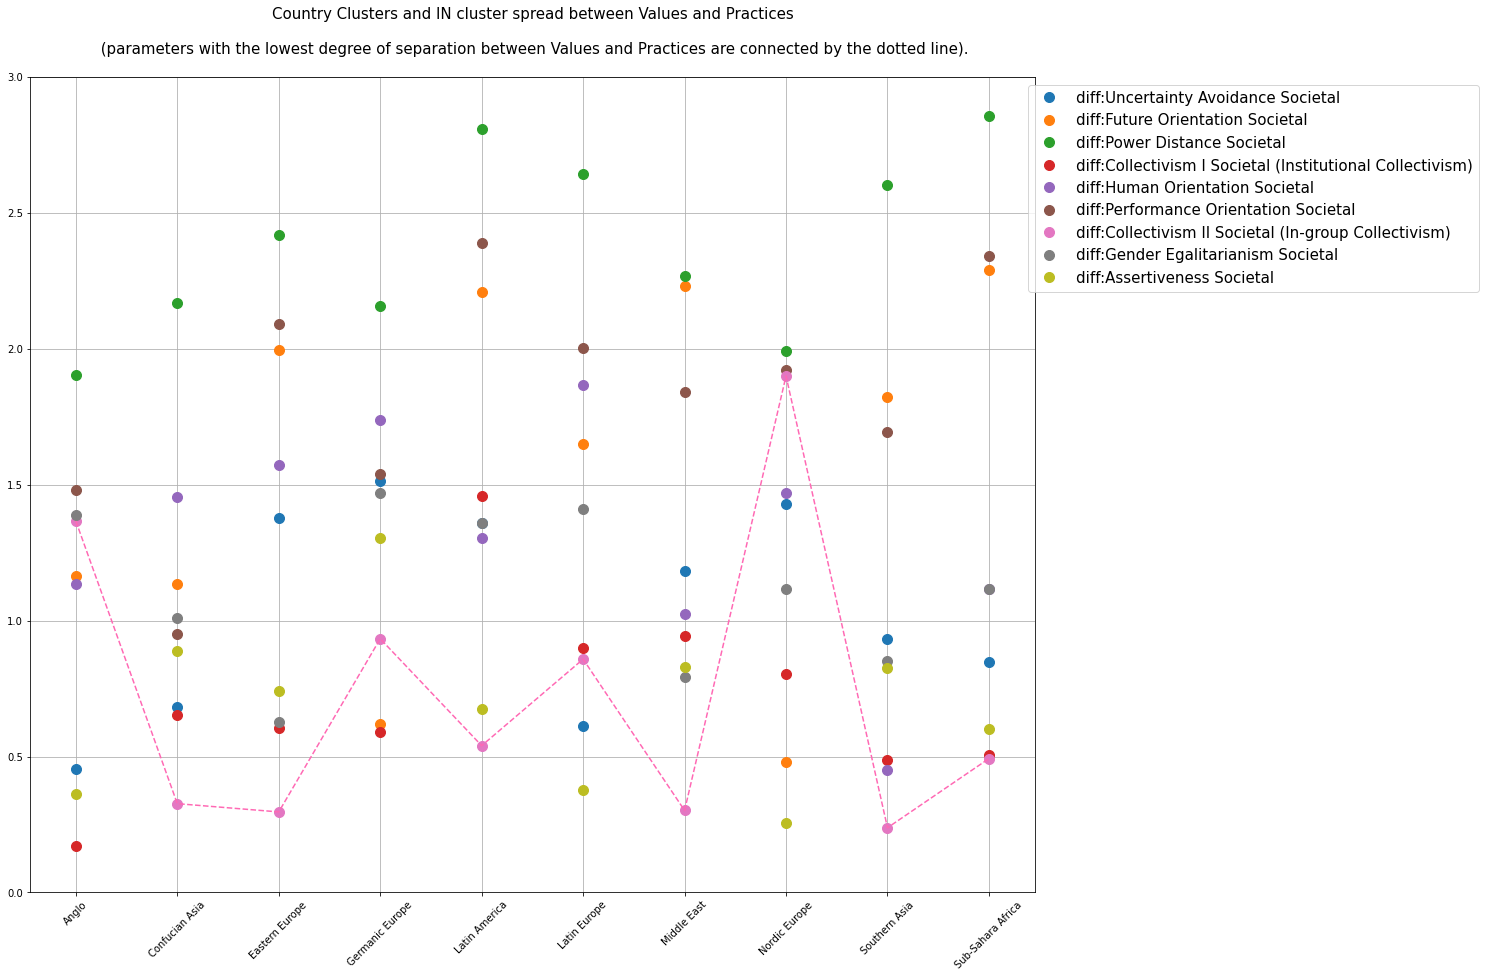

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18, 15))

plt.ylim(0,3)

plt.plot(diffo,marker ='o', markersize =10,linewidth = 0, )
plt.plot(diffo.index , diffo['diff:Collectivism II Societal (In-group Collectivism)'],  linestyle='dashed', color='hotpink')


plt.grid()
plt.legend(diffo.columns, bbox_to_anchor=(1.45, 1.0), loc='upper right', fontsize = 15)
plt.xticks(rotation=45)

plt.title('Country Clusters and IN cluster spread between Values and Practices\n\n (parameters with the lowest degree of separation between Values and Practices are connected by the dotted line).\n', fontsize =15)
plt.savefig('/content/drive/MyDrive/Globe_Project/country_cluster_spread2.jpg', bbox_inches='tight')

Focusing on the Eastern Europe Cluster

In [ ]:
eastern =diff_val_prac(society_reordered)
eastern_europe = eastern[eastern['Country Cluster']=='Eastern Europe']
eastern_europe

<ipython-input-18-ef2773a2bf81>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diff_selec[f'diff:{param_list[cols]}'] = abs(data.iloc[:, cols] - data.iloc[:, (cols+1)])


,Country Name,Country Cluster,diff:Uncertainty Avoidance Societal,diff:Future Orientation Societal,diff:Power Distance Societal,diff:Collectivism I Societal (Institutional Collectivism),diff:Human Orientation Societal,diff:Performance Orientation Societal,diff:Collectivism II Societal (In-group Collectivism),diff:Gender Egalitarianism Societal,diff:Assertiveness Societal
15,Hungary,Eastern Europe,1.54,2.49,3.07,0.97,2.13,2.53,0.29,0.55,1.44
16,Russia,Eastern Europe,2.19,2.60,2.90,0.61,1.65,2.15,0.16,0.11,0.85
19,Kazakhstan,Eastern Europe,0.76,1.48,2.16,0.25,1.63,1.84,0.18,0.91,0.62
28,Albania,Eastern Europe,0.80,1.56,1.10,0.10,0.70,0.82,0.52,0.48,0.48
31,Poland,Eastern Europe,1.09,2.09,1.98,0.31,1.69,2.23,0.22,0.50,0.16
44,Greece,Eastern Europe,1.70,1.79,3.01,2.15,1.89,2.61,0.19,1.41,1.62
54,Slovenia,Eastern Europe,1.21,1.83,2.76,0.25,1.46,2.75,0.28,0.87,0.59
59,Georgia,Eastern Europe,1.74,2.14,2.38,0.20,1.42,1.81,0.53,0.18,0.17


In [ ]:
geo_neigh = ['Georgia','Poland','Finland','Kazakhstan', 'China', 'USA', 'Japan']
pattern_neigh = '|'.join(geo_neigh )
geo_neigh_diff = diff_val_prac(society_reordered)
geo_neigh_diff=geo_neigh_diff[geo_neigh_diff['Country Name'].str.contains(pattern_neigh)]
geo_neigh_diff

<ipython-input-18-ef2773a2bf81>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  diff_selec[f'diff:{param_list[cols]}'] = abs(data.iloc[:, cols] - data.iloc[:, (cols+1)])


,Country Name,Country Cluster,diff:Uncertainty Avoidance Societal,diff:Future Orientation Societal,diff:Power Distance Societal,diff:Collectivism I Societal (Institutional Collectivism),diff:Human Orientation Societal,diff:Performance Orientation Societal,diff:Collectivism II Societal (In-group Collectivism),diff:Gender Egalitarianism Societal,diff:Assertiveness Societal
19,Kazakhstan,Eastern Europe,0.76,1.48,2.16,0.25,1.63,1.84,0.18,0.91,0.62
25,China,Confucian Asia,0.34,0.98,1.94,0.21,0.96,1.22,0.71,0.63,1.68
26,Japan,Confucian Asia,0.26,0.96,2.25,1.20,1.11,0.95,0.63,1.14,1.97
30,Finland,Nordic Europe,1.17,0.83,2.70,0.52,1.85,2.30,1.35,0.89,0.13
31,Poland,Eastern Europe,1.09,2.09,1.98,0.31,1.69,2.23,0.22,0.50,0.16
59,Georgia,Eastern Europe,1.74,2.14,2.38,0.20,1.42,1.81,0.53,0.18,0.17
61,USA,Anglo,0.15,1.16,2.03,0.03,1.36,1.65,1.52,1.72,0.23


In [ ]:
# PREP for visualization - spread between Values and Practices as distance of Practice score from its Paramater Value
color_list = ['orange', 'red', 'hotpink', 'cyan', 'lime', 'yellow','magenta','orchid','palegreen','orchid','lightcyan']

#Clening parmaters names for viz.
clean_param = (eastern_europe.columns.to_list()[2:])
num_param=len(clean_param )

index_list = eastern_europe.index.to_list()
country_using = eastern_europe['Country Name']

# making dict linking country index to country name
cr_country = dict(zip(index_list,country_using ))

# making dict to join country index and color
cr_color = dict(zip(index_list,color_list))

selected_dic ={}

# turning data df into numpy arrey for viz
for item in index_list :
  temp_practice = eastern_europe.iloc[:,2:].loc[item].to_numpy()
  selected_dic[item]= temp_practice

# set up for Values parameters to 0 
y_posi =[]

for i in range(0,num_param):
  y_posi.append(i)

x_posi = [0] * (num_param)

In [ ]:
selected_dic[16]

array([2.19, 2.6 , 2.9 , 0.61, 1.65, 2.15, 0.16, 0.11, 0.85])

In [ ]:
geo_neigh_diff


,Country Name,Country Cluster,diff:Uncertainty Avoidance Societal,diff:Future Orientation Societal,diff:Power Distance Societal,diff:Collectivism I Societal (Institutional Collectivism),diff:Human Orientation Societal,diff:Performance Orientation Societal,diff:Collectivism II Societal (In-group Collectivism),diff:Gender Egalitarianism Societal,diff:Assertiveness Societal
19,Kazakhstan,Eastern Europe,0.76,1.48,2.16,0.25,1.63,1.84,0.18,0.91,0.62
25,China,Confucian Asia,0.34,0.98,1.94,0.21,0.96,1.22,0.71,0.63,1.68
26,Japan,Confucian Asia,0.26,0.96,2.25,1.20,1.11,0.95,0.63,1.14,1.97
30,Finland,Nordic Europe,1.17,0.83,2.70,0.52,1.85,2.30,1.35,0.89,0.13
31,Poland,Eastern Europe,1.09,2.09,1.98,0.31,1.69,2.23,0.22,0.50,0.16
59,Georgia,Eastern Europe,1.74,2.14,2.38,0.20,1.42,1.81,0.53,0.18,0.17
61,USA,Anglo,0.15,1.16,2.03,0.03,1.36,1.65,1.52,1.72,0.23


In [ ]:
other_color_list = ['orange','hotpink', 'cyan', 'lime', 'yellow','magenta','blue']
geo_n_index_list = geo_neigh_diff.index.to_list()
country_geo_n= geo_neigh_diff['Country Name']

# making dict linking country index to country name
cr_geo_n = dict(zip(geo_n_index_list,country_geo_n ))

# making dict to join country index and color
cr_color_geo_n = dict(zip(geo_n_index_list,other_color_list))

selected_geo_n ={}

# turning data df into numpy arrey for viz
for item in geo_n_index_list:
  temp_practice = geo_neigh_diff.iloc[:,2:].loc[item].to_numpy()
  selected_geo_n[item]= temp_practice

In [ ]:
! pip install adjustText 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Preparing metadata (setup.py) ... done
  Created wheel for adjustText: filename=adjustText-0.7.3-py3-none-any.whl size=7096 sha256=71ff30611796619737a12e4d300513b0fe81975d57a328938522d6e9d99d4246
  Stored in directory: /root/.cache/pip/wheels/06/b2/e0/b239bd2c0ff89b98c4f0c86a63e7059f38a8dfaf6df2641c63
Successfully built adjustText


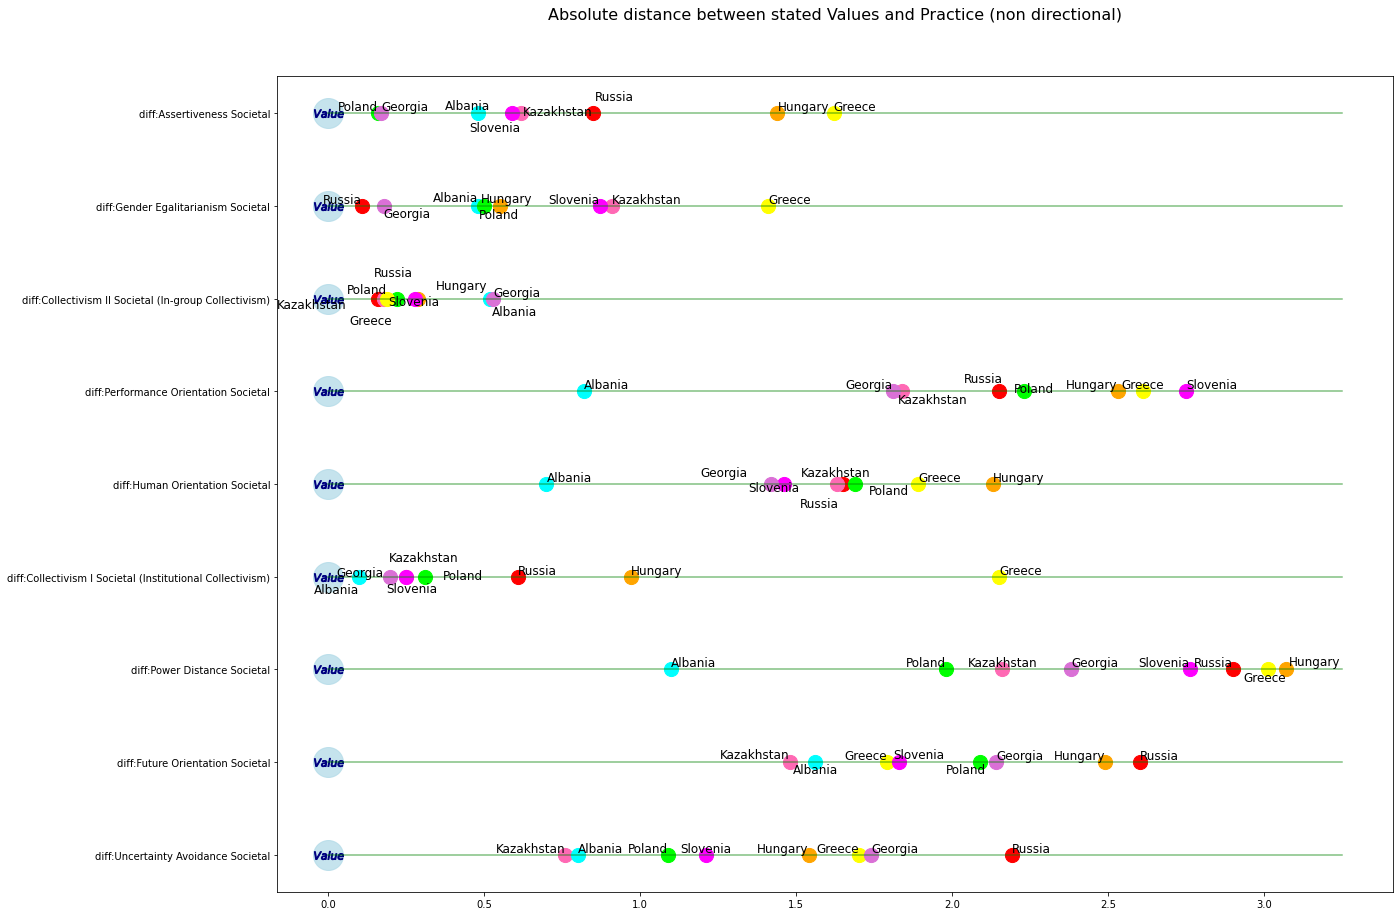

In [ ]:
import matplotlib.pyplot as plt
from adjustText import adjust_text

fig, ax =plt.subplots(figsize =(20, 15))

ax.set_yticks(y_posi)
ax.set_yticklabels(clean_param)

TEXTS = []
ax.scatter( x_posi,y_posi,s=900, color='lightblue', marker="o", alpha=.7)
ax.scatter( x_posi,y_posi,s=900, color='navy', marker="$Value$")

for i in range(len(x_posi)):     
  plt.plot([x_posi[i],3.25], [y_posi[i],y_posi[i]], color='green', alpha = 0.5)

for key in selected_dic:
  temp_diff = selected_dic[key]
  temp_cr = cr_country[key]

  ax.scatter( temp_diff, y_posi, s=200, color=cr_color[key])
  text = temp_cr

  for i in range(num_param):
      x = temp_diff[i]
      y = y_posi[i]
      text = temp_cr
      TEXTS.append(ax.text(x, y, text, fontsize=12)) 

  adjust_text(TEXTS, expand_points=(0.5, 0.5),ax=ax)


plt.title('Absolute distance between stated Values and Practice (non directional)\n\n\n', fontsize =16)

plt.savefig('/content/drive/MyDrive/Globe_Project/eastern_skittles_spread.jpg', bbox_inches='tight')

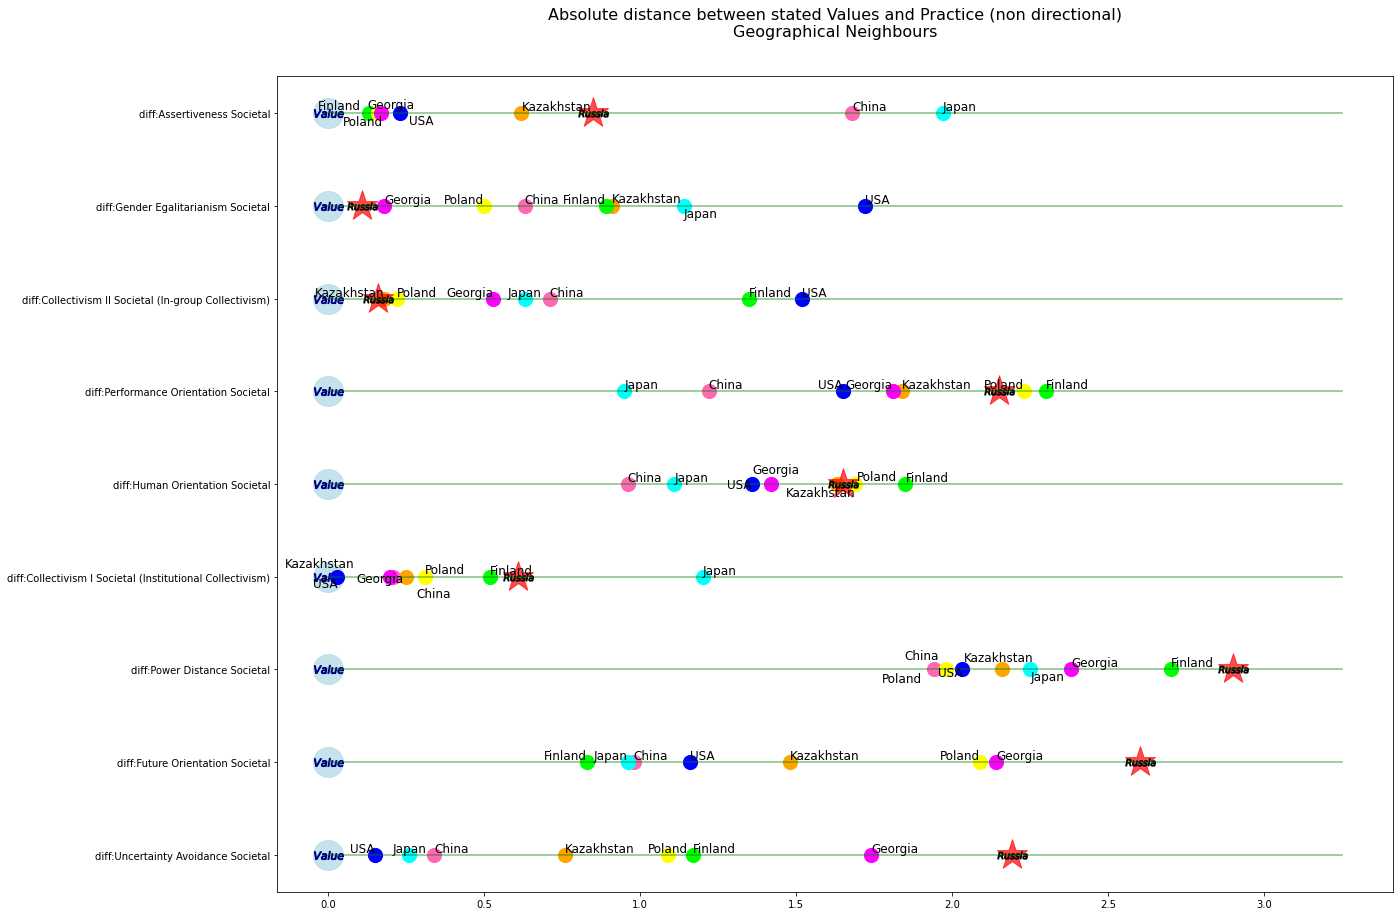

In [ ]:
import matplotlib.pyplot as plt
from adjustText import adjust_text

fig, ax =plt.subplots(figsize =(20, 15))

ax.set_yticks(y_posi)
ax.set_yticklabels(clean_param)

TEXTS = []
ax.scatter( x_posi,y_posi,s=900, color='lightblue', marker="o", alpha=.7)
ax.scatter( x_posi,y_posi,s=900, color='navy', marker="$Value$")


for i in range(len(x_posi)):     
  plt.plot([x_posi[i],3.25], [y_posi[i],y_posi[i]], color='green', alpha = 0.5)

for key in selected_geo_n:
  temp_diff = selected_geo_n[key]
  temp_cr = cr_geo_n[key]

  ax.scatter( temp_diff, y_posi, s=200, color=cr_color_geo_n[key])
  text = temp_cr

  for i in range(num_param):
      x = temp_diff[i]
      y = y_posi[i]
      text = temp_cr
      TEXTS.append(ax.text(x, y, text, fontsize=12)) 

  adjust_text(TEXTS, expand_points=(0.5, 0.5),ax=ax)
ax.scatter( selected_dic[16],y_posi,s=1000, color='red', marker="*", alpha=.7)
ax.scatter( selected_dic[16],y_posi,s=900, color='black', marker="$Russia$")

plt.title('Absolute distance between stated Values and Practice (non directional)\nGeographical Neighbours\n\n', fontsize =16)
plt.savefig('/content/drive/MyDrive/Globe_Project/neighbours_skittles_spread.jpg', bbox_inches='tight')

In [ ]:
eastern_europe_val = cons_values[cons_values['Country Cluster']=='Eastern Europe'].drop(columns=['Country Cluster'])
eastern_europe_prac = cons_practice[cons_practice['Country Cluster']=='Eastern Europe'].drop(columns=['Country Cluster'])

In [ ]:
easterm__mean_val = eastern_europe_val.describe().T['mean']
easterm__mean_prac = eastern_europe_prac.describe().T['mean']

plot_data_clust = easterm__mean_val.reset_index().rename(columns={'mean': 'mean Values'})
plot_data_clust['Russia Values']=eastern_europe_val.loc['Russia'].to_list()
plot_data_clust['mean Practice']=easterm__mean_prac.to_list()
plot_data_clust['Russia Practice']=eastern_europe_prac.loc['Russia'].to_list()

In [ ]:
plot_data_clust.set_index('index', inplace=True)

In [ ]:
plot_data_clust.index = plot_data_clust.index.str.replace('Values', '')
plot_data_clust

,mean Values,Russia Values,mean Practice,Russia Practice
index,,,,
Uncertainty Avoidance Societal,4.94375,5.07,3.56500,2.88
Future Orientation Societal,5.37625,5.48,3.37875,2.88
Power Distance Societal,2.83750,2.62,5.25750,5.52
Collectivism I Societal (Institutional Collectivism),4.33750,3.89,4.10000,4.50
Human Orientation Societal,5.42625,5.59,3.85500,3.94
Performance Orientation Societal,5.82125,5.54,3.72875,3.39
Collectivism II Societal (In-group Collectivism),5.57000,5.79,5.53625,5.63
Gender Egalitarianism Societal,4.46500,4.18,3.83875,4.07
Assertiveness Societal,3.77875,2.83,4.33000,3.68


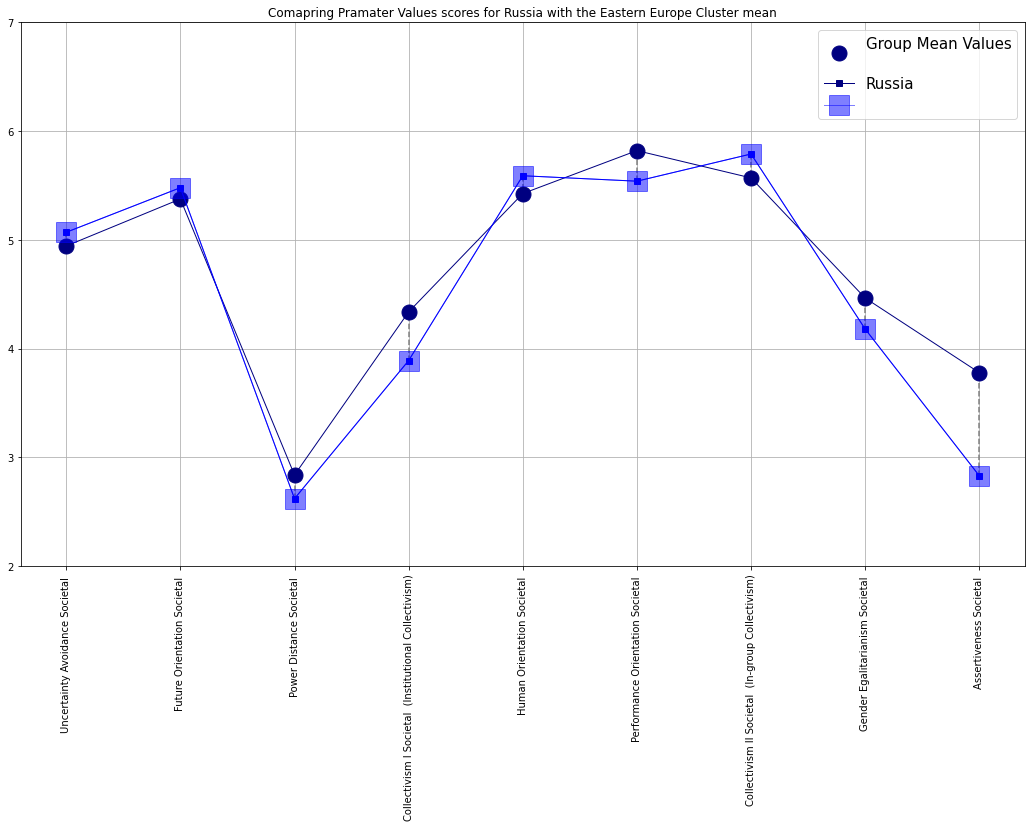

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18, 10))

plt.ylim(2,7)

val_x = plot_data_clust['Russia Values'].to_list()
val_y = plot_data_clust['mean Values'].to_list()


index_spots = []
for item in range(len(plot_data_clust['Russia Values'])):
  index_spots.append(item)

plt.vlines(index_spots, val_x, val_y , color="tab:gray",linestyle='dashed' )  # The vertical stems.

plt.plot(plot_data_clust['mean Values'],marker ='o', markersize =15,linewidth = 0, color='navy')
plt.plot(plot_data_clust['mean Values'], marker ='s',linewidth = 1, color='navy')
plt.plot(plot_data_clust['Russia Values'], marker ='s',markersize =20, linewidth = 1, color='blue', alpha=.5)
plt.plot(plot_data_clust['Russia Values'], marker ='s',linewidth = 1, color='blue')

plt.grid()
plt.xticks(rotation=90)
plt.legend(['Group Mean Values\n', 'Russia','',], fontsize =15)
plt.title('Comapring Pramater Values scores for Russia with the Eastern Europe Cluster mean')

plt.savefig('/content/drive/MyDrive/Globe_Project/russia_group_val.jpg', bbox_inches='tight')

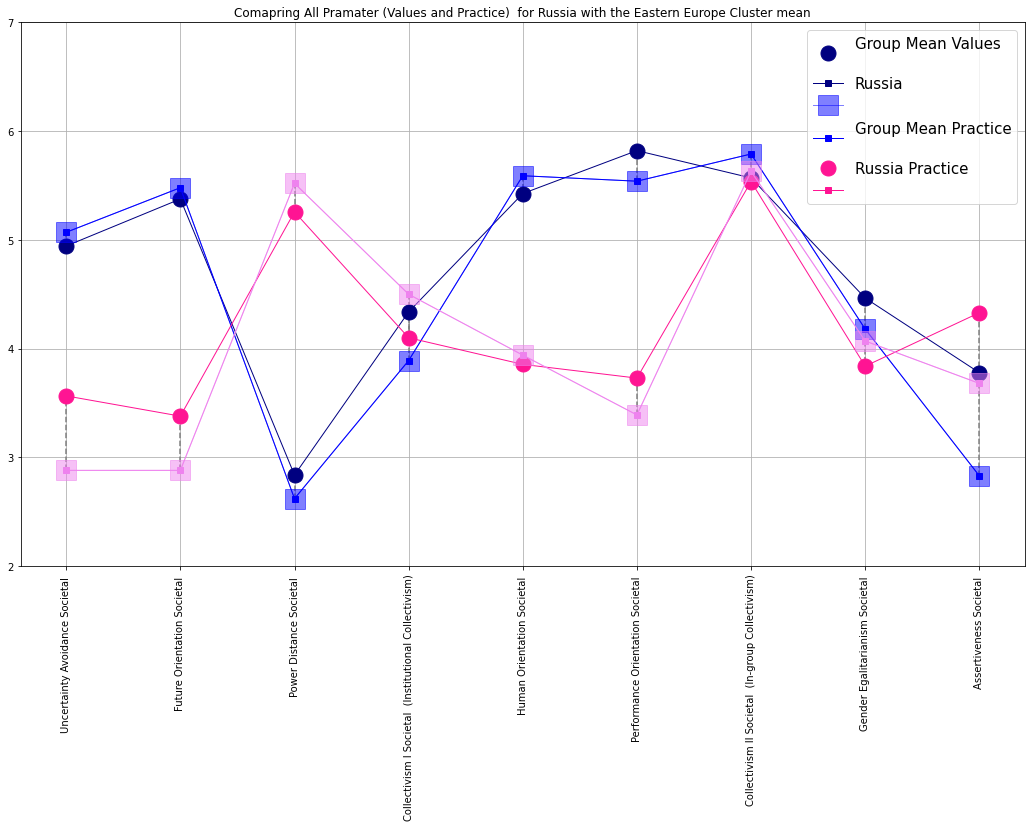

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18, 10))

plt.ylim(2,7)

val_x = plot_data_clust['Russia Values'].to_list()
val_y = plot_data_clust['mean Values'].to_list()

prac_x = plot_data_clust['Russia Practice'].to_list()
prac_y = plot_data_clust['mean Practice'].to_list()


index_spots = []
for item in range(len(plot_data_clust['Russia Values'])):
  index_spots.append(item)

plt.vlines(index_spots, val_x, val_y , color="tab:gray",linestyle='dashed' )  # The vertical stems.

plt.plot(plot_data_clust['mean Values'],marker ='o', markersize =15,linewidth = 0, color='navy')
plt.plot(plot_data_clust['mean Values'], marker ='s',linewidth = 1, color='navy')
plt.plot(plot_data_clust['Russia Values'], marker ='s',markersize =20, linewidth = 1, color='blue', alpha=.5)
plt.plot(plot_data_clust['Russia Values'], marker ='s',linewidth = 1, color='blue')


plt.vlines(index_spots, prac_x, prac_y , color="tab:gray",linestyle='dashed' )  # The vertical stems.

plt.plot(plot_data_clust['mean Practice'],marker ='o', markersize =15,linewidth = 0, color='deeppink')
plt.plot(plot_data_clust['mean Practice'], marker ='s',linewidth = 1, color='deeppink')
plt.plot(plot_data_clust['Russia Practice'], marker ='s',markersize =20, linewidth = 1, color='violet', alpha=.5)
plt.plot(plot_data_clust['Russia Practice'], marker ='s',linewidth = 1, color='violet')


plt.grid()
plt.xticks(rotation=90)
plt.legend(['Group Mean Values\n', 'Russia','','Group Mean Practice\n', 'Russia Practice',''], fontsize =15)
plt.title('Comapring All Pramater (Values and Practice)  for Russia with the Eastern Europe Cluster mean')

plt.savefig('/content/drive/MyDrive/Globe_Project/russia_group_COMBO.jpg', bbox_inches='tight')

The graph shows that the Values Parameters for Russia are  mostly close to the group average. Let's compare the above to how the Practices Parameters compare between Russia and the group average

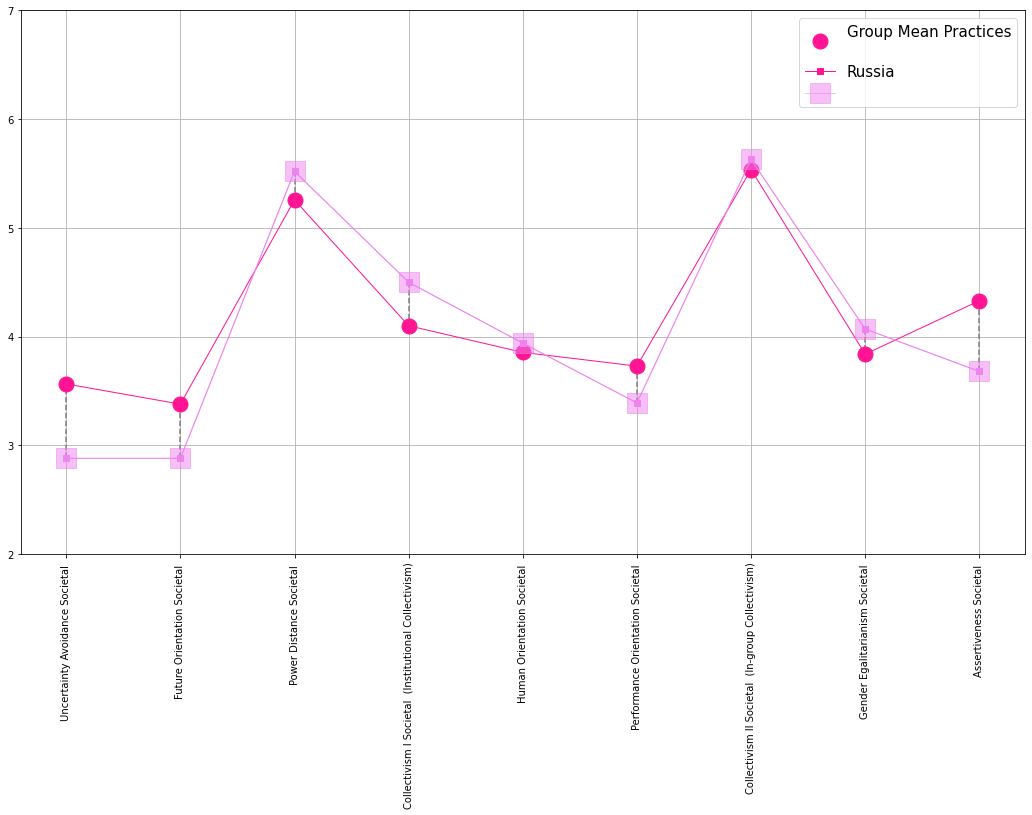

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18, 10))

plt.ylim(2,7)

prac_x = plot_data_clust['Russia Practice'].to_list()

prac_y = plot_data_clust['mean Practice'].to_list()

index_spots = []
for item in range(len(prac_x)):
  index_spots.append(item)

plt.vlines(index_spots, prac_x, prac_y , color="tab:gray",linestyle='dashed' )  # The vertical stems.

plt.plot(plot_data_clust['mean Practice'],marker ='o', markersize =15,linewidth = 0, color='deeppink')
plt.plot(plot_data_clust['mean Practice'], marker ='s',linewidth = 1, color='deeppink')
plt.plot(plot_data_clust['Russia Practice'], marker ='s',markersize =20, linewidth = 1, color='violet', alpha=.5)
plt.plot(plot_data_clust['Russia Practice'], marker ='s',linewidth = 1, color='violet')

plt.grid()
plt.xticks(rotation=90)
plt.legend(['Group Mean Practices\n', 'Russia',''], fontsize =15)

plt.savefig('/content/drive/MyDrive/Globe_Project/russia_group_prac.jpg', bbox_inches='tight')

Russia is not atypical in cluster, taking Russia as the focus of the investigation, let's see how far apart , or the spread, between the states Values and the actual Practices

<ipython-input-114-d077738335ae>:25: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(r, xy=(d, l), textcoords="offset points",


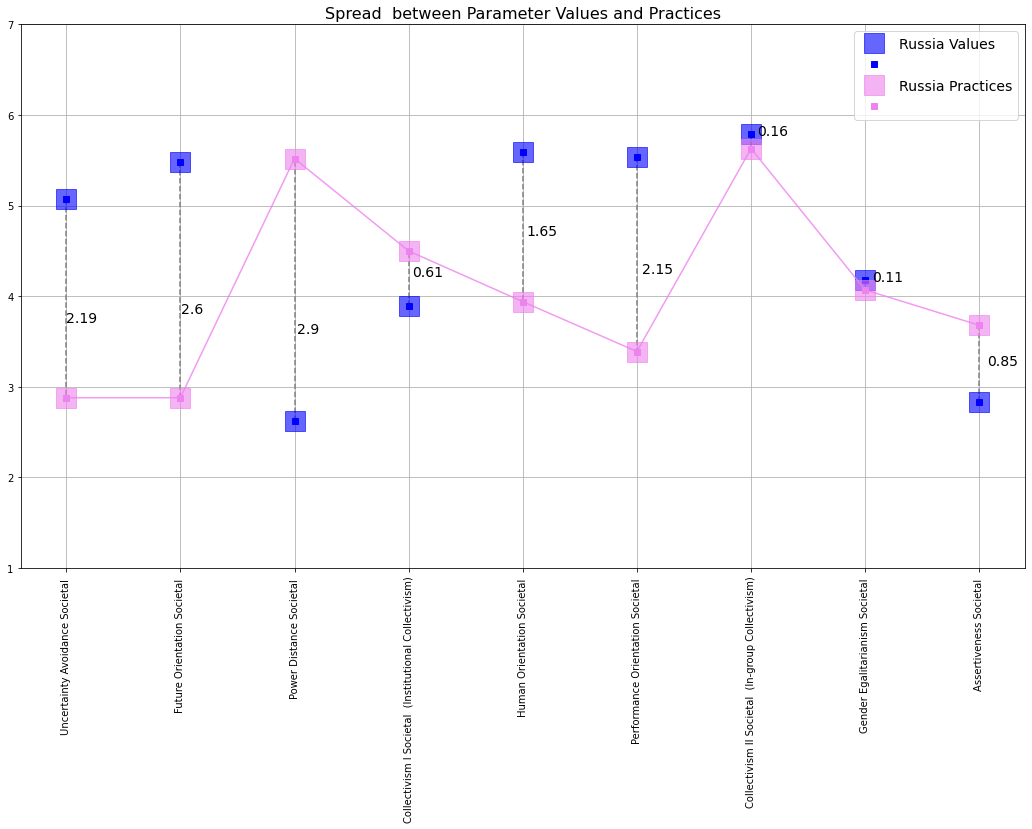

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18, 10))

# Prepping data for avx lines grapf

tr1 = (plot_data_clust['Russia Practice']+ plot_data_clust['Russia Values'] ) /(plot_data_clust['Russia Values'])
tr2 = (plot_data_clust['Russia Practice'] +plot_data_clust['Russia Values'] )/(plot_data_clust['Russia Practice'])
tr3 = ((plot_data_clust['Russia Practice']/tr1) + plot_data_clust['Russia Values'] /tr2).to_list()

russi = eastern_europe.iloc[1, 2:].to_list()
russ = [ round(elem, 3) for elem in russi ]

plt.ylim(1,7)
val_x = plot_data_clust['Russia Values'].to_list()

val_y = plot_data_clust['Russia Practice'].to_list()


index_spots = []
for item in range(len(val_x)):
  index_spots.append(item)


for d, l, r in zip(index_spots , tr3, russ):
    plt.annotate(r, xy=(d, l), textcoords="offset points",
                horizontalalignment="left", fontsize = 14)
    
plt.plot(plot_data_clust['Russia Values'], marker ='s',markersize =20, linewidth = 0, color='blue', alpha=.6)
plt.plot(plot_data_clust['Russia Values'], marker ='s',linewidth = 0, color='blue')

plt.plot(plot_data_clust['Russia Practice'], marker ='s',markersize =20, linewidth = 0, color='violet', alpha=.6)
plt.plot(plot_data_clust['Russia Practice'], marker ='s',linewidth = 0, color='violet')


plt.vlines(index_spots, val_x, val_y ,linestyle='dashed', color="gray")  # The vertical stems.


plt.plot(plot_data_clust['Russia Practice'], color='violet', alpha=.8)

plt.grid()
plt.xticks(rotation=90)
plt.legend(['Russia Values','', 'Russia Practices',''],fontsize=14)
plt.title ('Spread  between Parameter Values and Practices', fontsize=16)
plt.savefig('/content/drive/MyDrive/Globe_Project/russia_spread_val_prac.jpg', bbox_inches='tight')

In [ ]:
others_val = cons_values[cons_values['Country Cluster']!='Eastern Europe'].drop(columns=['Country Cluster'])
others_prac = cons_practice[cons_practice['Country Cluster']!='Eastern Europe'].drop(columns=['Country Cluster'])

plot_usa = others_val.T['USA'].reset_index().rename(columns={'USA':'USA Values'})
plot_usa['USA Practices'] = cons_practice.T['USA'].to_list()[1:]
plot_usa.set_index('index', inplace=True)
plot_usa.index = plot_usa.index.str.replace('Values', '')
plot_usa

,USA Values,USA Practices
index,,
Uncertainty Avoidance Societal,4.00,4.15
Future Orientation Societal,5.31,4.15
Power Distance Societal,2.85,4.88
Collectivism I Societal (Institutional Collectivism),4.17,4.20
Human Orientation Societal,5.53,4.17
Performance Orientation Societal,6.14,4.49
Collectivism II Societal (In-group Collectivism),5.77,4.25
Gender Egalitarianism Societal,5.06,3.34
Assertiveness Societal,4.32,4.55


<ipython-input-115-c53ca66e1ceb>:25: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(r, xy=(d, l), textcoords="offset points",


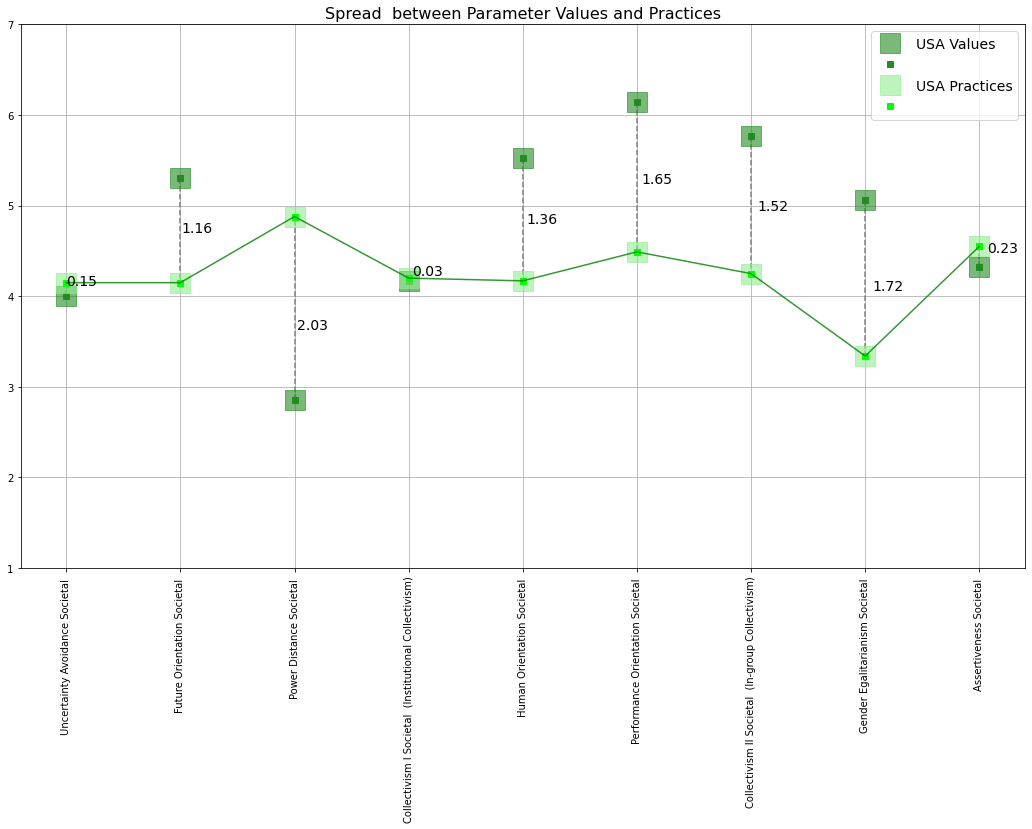

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18, 10))

# Prepping data for avx lines grapf

tr1a = (plot_usa['USA Practices']+ plot_usa['USA Values'] ) /(plot_usa['USA Values'])
tr2a = (plot_usa['USA Practices'] +plot_usa['USA Values'] )/(plot_usa['USA Practices'])
tr3a = ((plot_usa['USA Practices']/tr1a) + plot_usa['USA Values'] /tr2a).to_list()

usa_1= eastern.iloc[-1, 2:].to_list()
usa_diff = [ round(elem, 3) for elem in usa_1]

plt.ylim(1,7)
val_x = plot_usa['USA Values'].to_list()

val_y = plot_usa['USA Practices'].to_list()


index_spots = []
for item in range(len(val_x)):
  index_spots.append(item)


for d, l, r in zip(index_spots , tr3a, usa_diff):
    plt.annotate(r, xy=(d, l), textcoords="offset points",
                horizontalalignment="left", fontsize = 14)
    
plt.plot(plot_usa['USA Values'], marker ='s',markersize =20, linewidth = 0, color='forestgreen', alpha=.6)
plt.plot(plot_usa['USA Values'], marker ='s',linewidth = 0, color='forestgreen')

plt.plot(plot_usa['USA Practices'], marker ='s',markersize =20, linewidth = 0, color='lightgreen', alpha=.6)
plt.plot(plot_usa['USA Practices'], marker ='s',linewidth = 0, color='lime')


plt.vlines(index_spots, val_x, val_y ,linestyle='dashed', color="gray")  # The vertical stems.


plt.plot(plot_usa['USA Practices'], color='green', alpha=.8)

plt.grid()
plt.xticks(rotation=90)
plt.legend(['USA Values','', 'USA Practices',''],fontsize=14)
plt.title ('Spread  between Parameter Values and Practices', fontsize=16)

plt.savefig('/content/drive/MyDrive/Globe_Project/USA_spread_val_prac.jpg', bbox_inches='tight')

In [ ]:
plot_other_val = others_val.T
plot_other_val.columns += ' Values'

plot_other_prac = others_prac.T
plot_other_prac.columns += ' Practices'


plot_other_val.index = plot_other_val.index.str.replace('Values', '')
plot_other_prac.index = plot_other_prac.index.str.replace('Practices', '')

In [ ]:
others_combo = plot_other_val.join(plot_other_prac)

In [ ]:
others_diff = eastern.set_index('Country Name').T.iloc[1:, :]

In [ ]:
others_combo

Country Name,England Values,China Values,Japan Values,Finland Values,Germany (EAST) Values,Germany (WEST) Values,USA Values,England Practices,China Practices,Japan Practices,Finland Practices,Germany (EAST) Practices,Germany (WEST) Practices,USA Practices
Uncertainty Avoidance Societal,4.11,5.28,4.33,3.85,3.94,3.32,4.00,4.65,4.94,4.07,5.02,5.16,5.22,4.15
Future Orientation Societal,5.06,4.73,5.25,5.07,5.23,4.85,5.31,4.28,3.75,4.29,4.24,3.95,4.27,4.15
Power Distance Societal,2.80,3.10,2.86,2.19,2.69,2.54,2.85,5.15,5.04,5.11,4.89,5.54,5.25,4.88
Collectivism I Societal (Institutional Collectivism),4.31,4.56,3.99,4.11,4.68,4.82,4.17,4.27,4.77,5.19,4.63,3.56,3.79,4.20
Human Orientation Societal,5.43,5.32,5.41,5.81,5.44,5.46,5.53,3.72,4.36,4.30,3.96,3.40,3.18,4.17
Performance Orientation Societal,5.90,5.67,5.17,6.11,6.09,6.01,6.14,4.08,4.45,4.22,3.81,4.09,4.25,4.49
Collectivism II Societal (In-group Collectivism),5.55,5.09,5.26,5.42,5.22,5.18,5.77,4.08,5.80,4.63,4.07,4.52,4.02,4.25
Gender Egalitarianism Societal,5.17,3.68,4.33,4.24,4.90,4.89,5.06,3.67,3.05,3.19,3.35,3.06,3.10,3.34
Assertiveness Societal,3.70,5.44,5.56,3.68,3.23,3.09,4.32,4.15,3.76,3.59,3.81,4.73,4.55,4.55


<ipython-input-116-507bfd356d77>:25: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(r, xy=(d, l), textcoords="offset points",


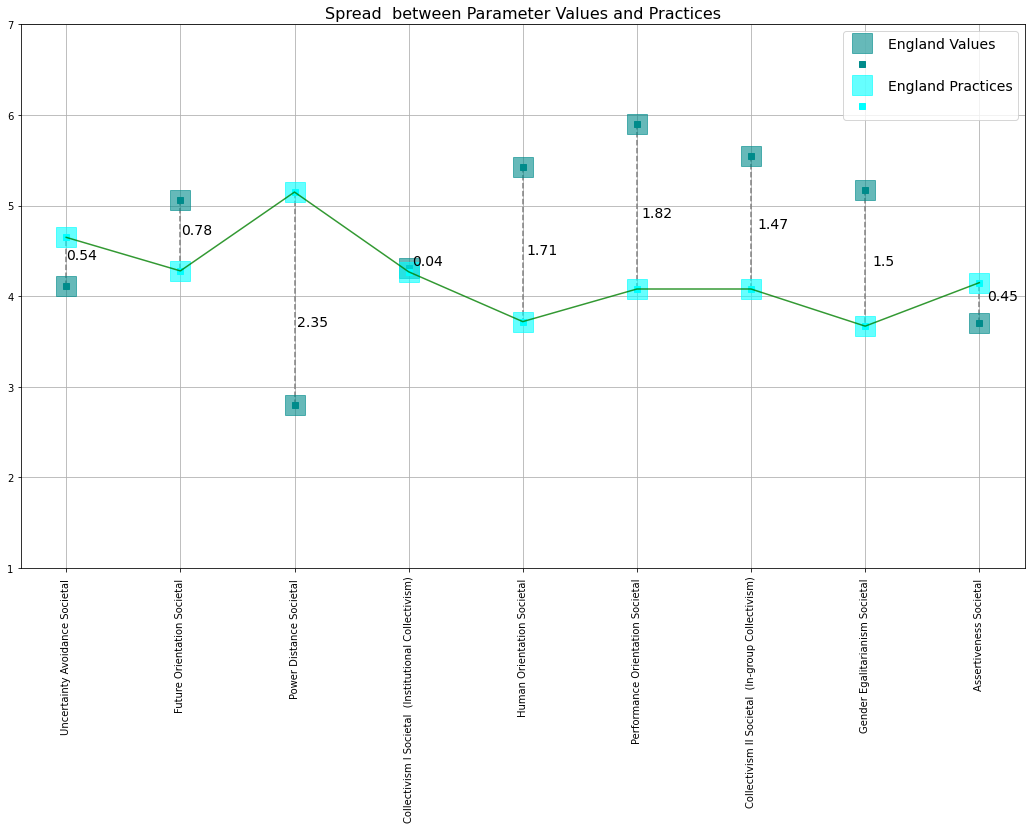

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18, 10))

# Prepping data for avx lines grapf

tr1a = (others_combo['England Practices']+ others_combo['England Values'] ) /(others_combo['England Values'])
tr2a = (others_combo['England Practices'] +others_combo['England Values'] )/(others_combo['England Practices'])
tr3a = ((others_combo['England Practices']/tr1a) + others_combo['England Values'] /tr2a).to_list()

uk_1 = others_diff['England'].to_list()
uk_diff = [round(ele, 3) for ele in uk_1]

plt.ylim(1,7)
val_x = others_combo['England Values'].to_list()

val_y = others_combo['England Practices'].to_list()


index_spots = []
for item in range(len(val_x)):
  index_spots.append(item)


for d, l, r in zip(index_spots , tr3a, uk_diff):
    plt.annotate(r, xy=(d, l), textcoords="offset points",
                horizontalalignment="left", fontsize = 14)
    
plt.plot(others_combo['England Values'], marker ='s',markersize =20, linewidth = 0, color='darkcyan', alpha=.6)
plt.plot(others_combo['England Values'], marker ='s',linewidth = 0, color='darkcyan')

plt.plot(others_combo['England Practices'], marker ='s',markersize =20, linewidth = 0, color='cyan', alpha=.6)
plt.plot(others_combo['England Practices'], marker ='s',linewidth = 0, color='cyan')


plt.vlines(index_spots, val_x, val_y ,linestyle='dashed', color="gray")  # The vertical stems.


plt.plot(others_combo['England Practices'], color='green', alpha=.8)

plt.grid()
plt.xticks(rotation=90)
plt.legend(['England Values','', 'England Practices',''],fontsize=14)
plt.title ('Spread  between Parameter Values and Practices', fontsize=16)

plt.savefig('/content/drive/MyDrive/Globe_Project/england_spread_val_prac.jpg', bbox_inches='tight')

<ipython-input-117-1dc4608d68c0>:25: UserWarning: You have used the `textcoords` kwarg, but not the `xytext` kwarg.  This can lead to surprising results.
  plt.annotate(r, xy=(d, l), textcoords="offset points",


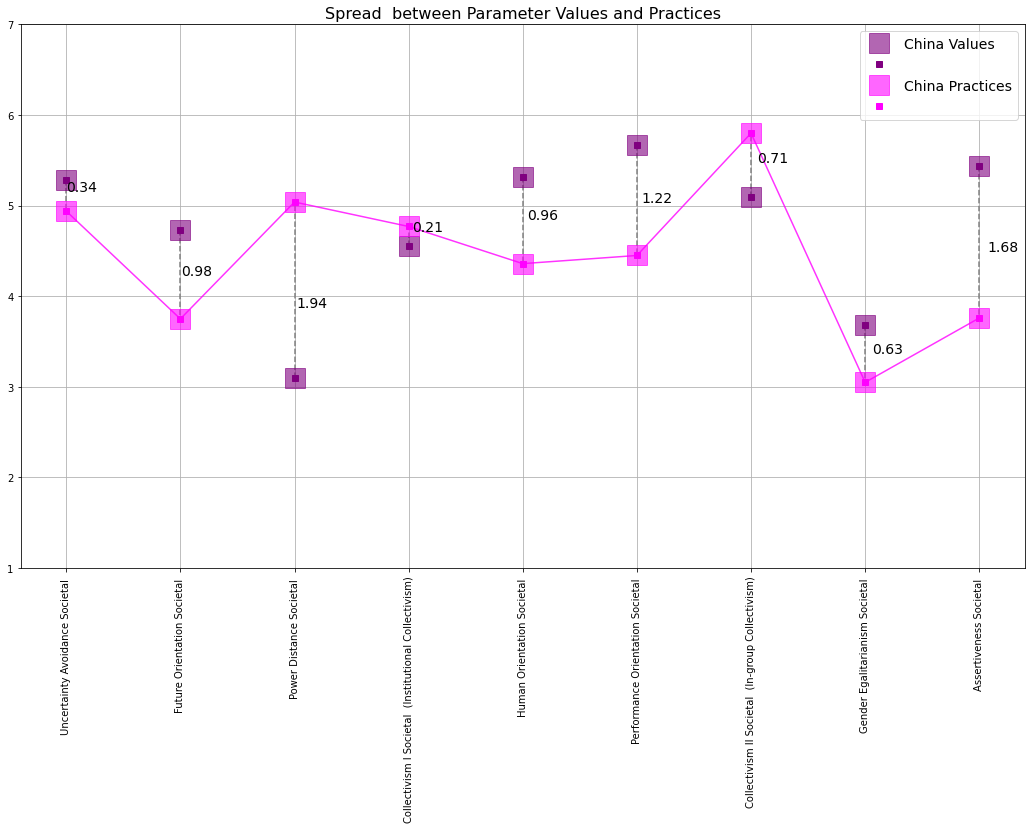

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18, 10))

# Prepping data for avx lines grapf

tr1a = (others_combo['China Practices']+ others_combo['China Values'] ) /(others_combo['China Values'])
tr2a = (others_combo['China Practices'] +others_combo['China Values'] )/(others_combo['China Practices'])
tr3a = ((others_combo['China Practices']/tr1a) + others_combo['China Values'] /tr2a).to_list()

uk_1 = others_diff['China'].to_list()
uk_diff = [round(ele, 3) for ele in uk_1]

plt.ylim(1,7)
val_x = others_combo['China Values'].to_list()

val_y = others_combo['China Practices'].to_list()


index_spots = []
for item in range(len(val_x)):
  index_spots.append(item)


for d, l, r in zip(index_spots , tr3a, uk_diff):
    plt.annotate(r, xy=(d, l), textcoords="offset points",
                horizontalalignment="left", fontsize = 14)
    
plt.plot(others_combo['China Values'], marker ='s',markersize =20, linewidth = 0, color='purple', alpha=.6)
plt.plot(others_combo['China Values'], marker ='s',linewidth = 0, color='purple')

plt.plot(others_combo['China Practices'], marker ='s',markersize =20, linewidth = 0, color='fuchsia', alpha=.6)
plt.plot(others_combo['China Practices'], marker ='s',linewidth = 0, color='fuchsia')


plt.vlines(index_spots, val_x, val_y ,linestyle='dashed', color="gray")  # The vertical stems.


plt.plot(others_combo['China Practices'], color='fuchsia', alpha=.8)

plt.grid()
plt.xticks(rotation=90)
plt.legend(['China Values','', 'China Practices',''],fontsize=14)
plt.title ('Spread  between Parameter Values and Practices', fontsize=16)

plt.savefig('/content/drive/MyDrive/Globe_Project/china_spread_val_prac.jpg', bbox_inches='tight')

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
levada_14 = pd.read_csv('/content/drive/MyDrive/RUSSdata/Levada/information_trust/2023-01-04/TRANSLATED_Levada_trust_survey_14.csv')


In [ ]:
levada_14

,0,1,2,3,4,5,name
0,in,Total,18-24 years old,25-39 years old,40-54 years old,55 years and older,DO YOU AGREE WITH THE OPINION THAT ANY INFORMA...
1,Completely agree,18,9,14,17,24,DO YOU AGREE WITH THE OPINION THAT ANY INFORMA...
2,Rather agree,29,25,31,26,29,DO YOU AGREE WITH THE OPINION THAT ANY INFORMA...
3,Rather disagree,27,32,31,29,22,DO YOU AGREE WITH THE OPINION THAT ANY INFORMA...
4,Absolutely disagree,13,20,14,15,11,DO YOU AGREE WITH THE OPINION THAT ANY INFORMA...
5,Difficult to answer,13,15,10,14,14,DO YOU AGREE WITH THE OPINION THAT ANY INFORMA...


In [ ]:
yearly_mean_gov_app = pd.read_csv('/content/drive/MyDrive/RUSSdata/Levada/2023-01-03/Levada_Approval of the government.csv').tail(10)['Approve'].mean()

In [ ]:
compare = levada_14.iloc[1:-4, :2].replace('Completely agree', 'Completely agree that\n info that differs fr State Media is False')
compare.loc[2] = ['Goverment Approval', yearly_mean_gov_app] 
compare['1']= compare['1'].astype(int)

In [ ]:
levada_select_14=levada_14.iloc[1:-3, :2].rename(columns={'0':'FALSE IF != to STATE SOURCES(in %)', '1': 'Total'})#.set_index('FALSE IF != to STATE SOURCES(in %)')

In [ ]:
levada_select_14['Total']= levada_select_14['Total'].astype(int)

In [ ]:
levada_select_14

,FALSE IF != to STATE SOURCES(in %),Total
1,Completely agree,18
2,Rather agree,29


In [ ]:
levada_select_14.sum()

FALSE IF != to STATE SOURCES(in %)    Completely agreeRather agree
Total                                                           47
dtype: object

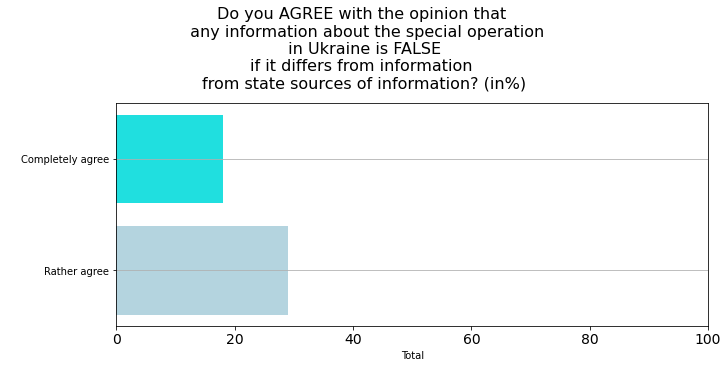

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

fig, ax = plt.subplots( figsize=(10,5), constrained_layout=True)


plt.xlim(0,100)


ax = sns.barplot(data=levada_select_14, y="FALSE IF != to STATE SOURCES(in %)", x="Total", palette=['cyan', 'lightblue'],orient='h')
#ax.bar_label(ax.containers[0],fontsize =14, label_type='center')

plt.xticks(fontsize =14)
plt.ylabel(' ')

fig.suptitle('Do you AGREE with the opinion that \n any information about the special operation\n in Ukraine is FALSE \nif it differs from information \nfrom state sources of information? (in%)', fontsize=16)

plt.grid(axis='y')

plt.savefig('/content/drive/MyDrive/Globe_Project/state_info_trust.jpg', bbox_inches='tight')

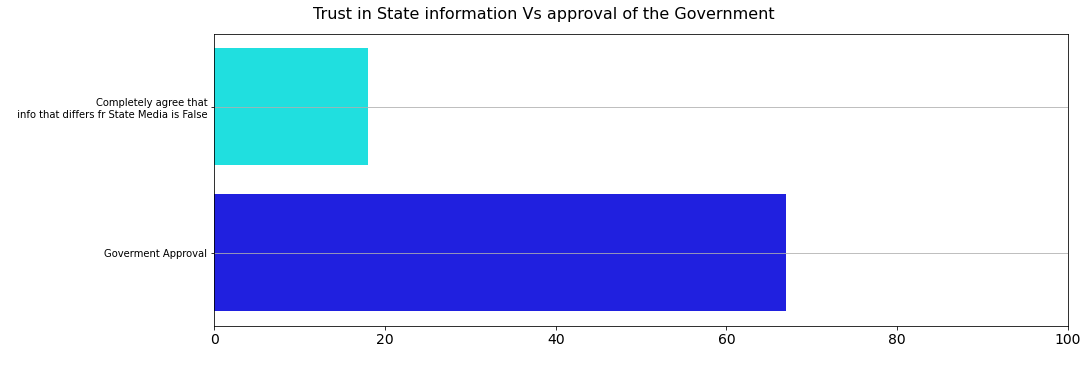

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

fig, ax = plt.subplots( figsize=(15,5), constrained_layout=True)


plt.xlim(0,100)
pal = sns.color_palette("pastel", len(levada_select_14))

ax = sns.barplot(data=compare, y="0", x="1", palette=['cyan', 'blue'],orient='h')
#ax.bar_label(ax.containers[0],fontsize =14, label_type='center')

plt.xticks(fontsize =14)
plt.ylabel(' ', rotation=0, fontsize =15)
plt.xlabel(' ')

fig.suptitle('Trust in State information Vs approval of the Government', fontsize=16)

plt.grid(axis='y')

plt.savefig('/content/drive/MyDrive/Globe_Project/state_info_trust1.jpg', bbox_inches='tight')

In [ ]:
cols_lef14 = levada_14.loc[0][:2]
lev14 = levada_14.iloc[1:,:-5]
lev14.columns=cols_lef14

In [ ]:
lev14= lev14.loc[[1, 4, 2, 3, 5], :]

In [ ]:
lev14['Total']= lev14['Total'].astype(int)

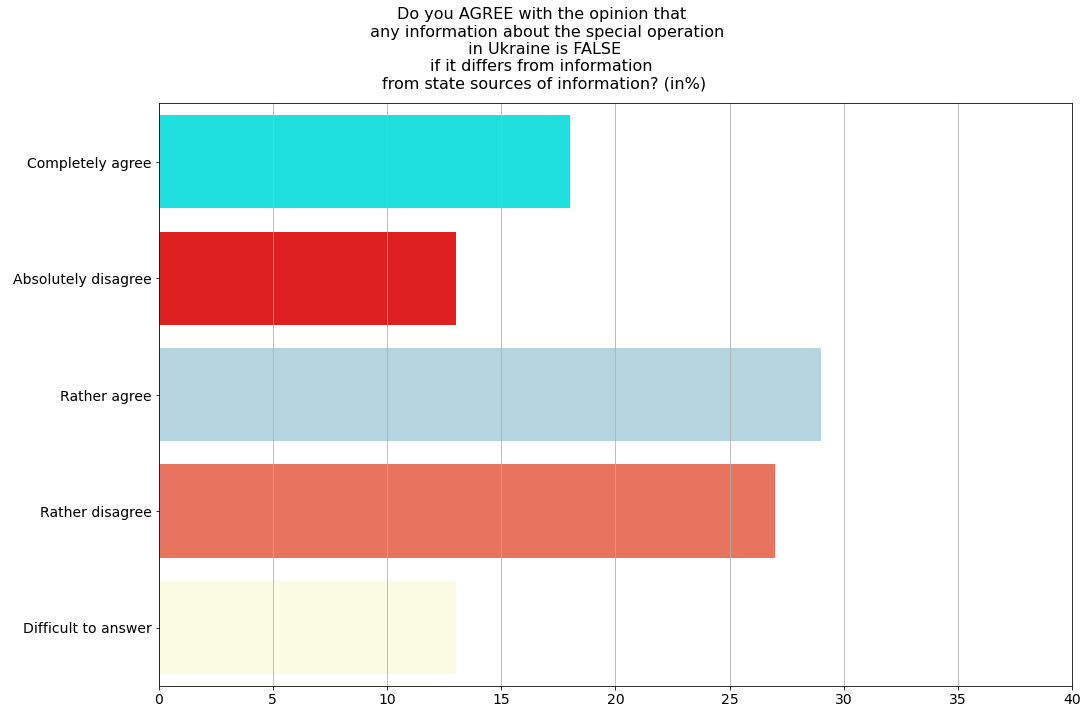

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns

fig, ax = plt.subplots( figsize=(15,10), constrained_layout=True)


plt.xlim(0,40)

ax = sns.barplot(data=lev14, y="in", x="Total", palette=['cyan', 'red', 'lightblue', 'tomato', 'lightyellow'],orient='h')
#ax.bar_label(ax.containers[0],fontsize =14, label_type='center')

plt.xticks(fontsize =14)
plt.yticks(fontsize =14)
plt.ylabel(' ', rotation=0)
plt.xlabel(' ')

fig.suptitle('Trust in State information Vs approval of the Government', fontsize=16)

plt.grid(axis='x')

fig.suptitle('Do you AGREE with the opinion that \n any information about the special operation\n in Ukraine is FALSE \nif it differs from information \nfrom state sources of information? (in%)', fontsize=16)
plt.savefig('/content/drive/MyDrive/Globe_Project/state_info_trust_all.jpg', bbox_inches='tight')